In [1]:
import json
import numpy as np

user_study_data = {}
probands = [0, 1, 2, 3, 4,  5, 6, 7]

def sum_durations(timings):
    return sum(timing["duration"] for timing in timings)

for i in probands:
    for condition in ["normal", "ai"]:
        # load json file
        with open(f"user_study_results/{condition}_{i}.json", "r") as f:
            data = json.load(f)
            
        times = [sum_durations(entry["timings"]) for entry in data[5:55]]
        print(len(times))
        print(condition, np.mean(times))
        
        user_study_data[f"{condition}_{i}"] = data

50
normal 41.186240000000005
50
ai 22.93984
50
normal 26.553879999999996
50
ai 22.61402
50
normal 29.87658
50
ai 28.909900000000004
50
normal 39.81788
50
ai 26.373160000000002
50
normal 46.64672
50
ai 21.61654
50
normal 30.057639999999996
50
ai 22.426440000000003
50
normal 31.93988
50
ai 19.58416
50
normal 32.35524
50
ai 29.017139999999994


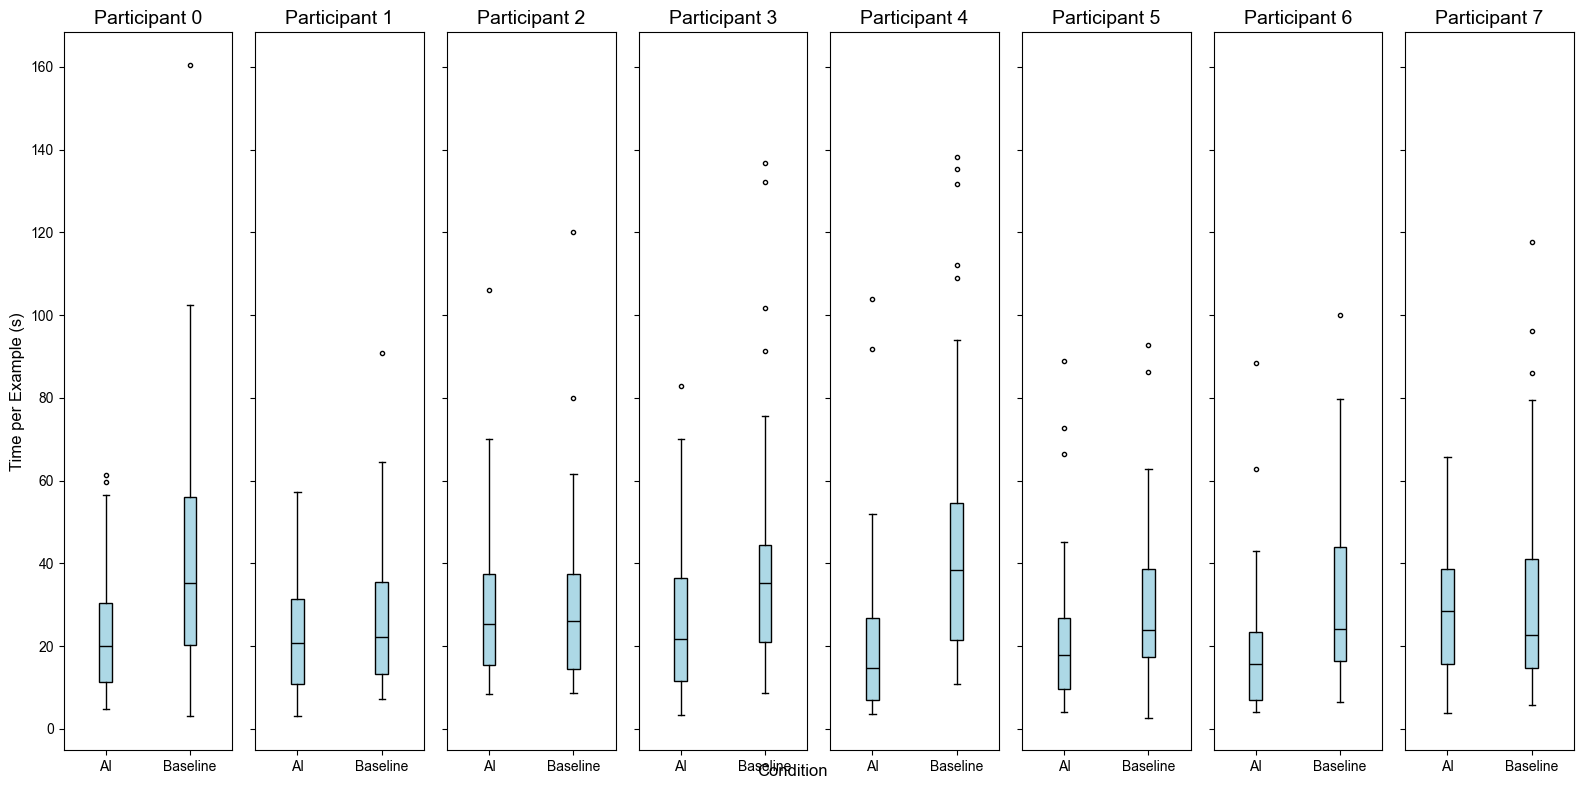

Shapiro-Wilk Test for Differences: Statistic=0.944, p=0.647
Differences are normally distributed, using paired t-test.
Paired t-test: t=-3.640, p=0.008
Significant difference at α=0.05.


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_rel, wilcoxon

# Set professional style for conference paper with Arial font
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

# Create figure with subplots
fig, axes = plt.subplots(1, len(probands), figsize=(16, len(probands)), sharey=True)


for idx, i in enumerate(probands):
    ai_times = [sum_durations(entry["timings"]) for entry in user_study_data[f"ai_{i}"][5:55]]
    normal_times = [sum_durations(entry["timings"]) for entry in user_study_data[f"normal_{i}"][5:55]]
    
    # Boxplot with professional styling
    bp = axes[idx].boxplot([ai_times, normal_times], tick_labels=['AI', 'Baseline'], patch_artist=True,
                           boxprops=dict(facecolor='lightblue', color='black'),
                           medianprops=dict(color='black'),
                           whiskerprops=dict(color='black'),
                           capprops=dict(color='black'),
                           flierprops=dict(marker='o', color='black', markersize=3))
    
    axes[idx].set_title(f'Participant {i}')  # Assuming participants are numbered 1,2,3
    if idx == 0:
        axes[idx].set_ylabel('Time per Example (s)')

# Overall title
# fig.suptitle('Annotation Time per Example by Participant and Condition', fontsize=16, y=1.02)

# Common x-label
fig.text(0.5, 0.02, 'Condition', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Significance test remains the same
# Sammle die Mittelwerte pro Proband
ai_means = []
normal_means = []

for i in probands:
    ai_times = [sum_durations(entry["timings"]) for entry in user_study_data[f"ai_{i}"][5:55]]
    normal_times = [sum_durations(entry["timings"]) for entry in user_study_data[f"normal_{i}"][5:55]]
    ai_means.append(np.mean(ai_times))
    normal_means.append(np.mean(normal_times))

# Differenzen
differences = np.array(ai_means) - np.array(normal_means)

# Normalitätsprüfung der Differenzen
stat, p_shapiro = shapiro(differences)
print(f"Shapiro-Wilk Test for Differences: Statistic={stat:.3f}, p={p_shapiro:.3f}")
if p_shapiro > 0.05:
    print("Differences are normally distributed, using paired t-test.")
    t_stat, p_ttest = ttest_rel(ai_means, normal_means)
    print(f"Paired t-test: t={t_stat:.3f}, p={p_ttest:.3f}")
    if p_ttest < 0.05:
        print("Significant difference at α=0.05.")
    else:
        print("No significant difference at α=0.05.")
else:
    print("Differences are not normally distributed, using Wilcoxon signed-rank test.")
    w_stat, p_wilcoxon = wilcoxon(ai_means, normal_means)
    print(f"Wilcoxon test: Statistic={w_stat:.3f}, p={p_wilcoxon:.3f}")
    if p_wilcoxon < 0.05:
        print("Significant difference at α=0.05.")
    else:
        print("No significant difference at α=0.05.")

In [3]:
ai_mean = np.mean(ai_means)
ai_std = np.std(ai_means, ddof=1)  # sample std
normal_mean = np.mean(normal_means)
normal_std = np.std(normal_means, ddof=1)

# Calculate degrees of freedom
df = len(probands) - 1

if p_shapiro > 0.05:
    normality_text = f"A Shapiro-Wilk test confirmed the normality of the differences ($W = {stat:.3f}$, $p = {p_shapiro:.3f}$)."
    test_text = f"We performed a paired $t$-test, which revealed {'a significant' if p_ttest < 0.05 else 'no significant'} difference in average annotation times per example between AI-assisted ($M = {ai_mean:.2f}$, $SD = {ai_std:.2f}$) and baseline ($M = {normal_mean:.2f}$, $SD = {normal_std:.2f}$) conditions ($t({df}) = {t_stat:.3f}$, $p = {p_ttest:.3f}$)."
else:
    normality_text = f"A Shapiro-Wilk test indicated non-normality of the differences ($W = {stat:.3f}$, $p = {p_shapiro:.3f}$)."
    test_text = f"We performed a Wilcoxon signed-rank test, which revealed {'a significant' if p_wilcoxon < 0.05 else 'no significant'} difference in average annotation times per example between AI-assisted ($M = {ai_mean:.2f}$, $SD = {ai_std:.2f}$) and baseline ($M = {normal_mean:.2f}$, $SD = {normal_std:.2f}$) conditions ($W = {w_stat:.3f}$, $p = {p_wilcoxon:.3f}$)."


In [4]:
print(test_text, normality_text)

We performed a paired $t$-test, which revealed a significant difference in average annotation times per example between AI-assisted ($M = 24.19$, $SD = 3.49$) and baseline ($M = 34.80$, $SD = 6.92$) conditions ($t(7) = -3.640$, $p = 0.008$). A Shapiro-Wilk test confirmed the normality of the differences ($W = 0.944$, $p = 0.647$).


In [5]:
# calculate percent reduction
reduction = ((normal_mean - ai_mean) / normal_mean) * 100
print(f"Average time reduction with AI assistance: {reduction:.2f}%")

Average time reduction with AI assistance: 30.51%
